In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '51e6b552-6da1-45d8-8929-fa046ab1fa6f',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [2]:
type(data)

dict

In [30]:
#jupyter console -> jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10

In [4]:
import pandas as pd

In [5]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df.head(1)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11849,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,19800150.0,19800150.0,...,56.6087,1.966423e+12,None,2024-12-23T17:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 23:10:24.491746


In [6]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)


In [93]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '51e6b552-6da1-45d8-8929-fa046ab1fa6f',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.to_datetime('now')
    #df = pd.concat([df,df2])

    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\Hp\Documents\Python\API_datapull.csv'):
        df.to_csv(r'C:\Users\Hp\Documents\Python\API_datapull.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\Hp\Documents\Python\API_datapull.csv', mode = 'a', header = False)


    

In [95]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('Api Runner Executed Succesfully')
    sleep(60)
exit()


Api Runner Executed Succesfully
Api Runner Executed Succesfully
Api Runner Executed Succesfully
Api Runner Executed Succesfully


KeyboardInterrupt: 

In [7]:
df45 = pd.read_csv(r'C:\Users\Hp\Documents\Python\API_datapull.csv')

In [ ]:
pd.set_option('display.float.format', lambda x: '%.5f' % x)

In [8]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3.head(3)

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.651863,-2.148477,-12.509507,-4.545004,38.559585,46.989923
Ethereum,2.106516,1.015964,-15.964422,-2.197921,33.473647,27.045312
Tether USDt,0.026799,-0.042384,-0.119603,-0.271920,-0.036781,-0.106769


In [13]:
df4 = df3.stack()
df4.head(10)

name                                  
Bitcoin   quote.USD.percent_change_1h      0.651863
          quote.USD.percent_change_24h    -2.148477
          quote.USD.percent_change_7d    -12.509507
          quote.USD.percent_change_30d    -4.545004
          quote.USD.percent_change_60d    38.559585
          quote.USD.percent_change_90d    46.989923
Ethereum  quote.USD.percent_change_1h      2.106516
          quote.USD.percent_change_24h     1.015964
          quote.USD.percent_change_7d    -15.964422
          quote.USD.percent_change_30d    -2.197921
dtype: float64

In [14]:
type(df4)

pandas.core.series.Series

In [16]:
df5 = df4.to_frame(name = 'values')

In [105]:
type(df5)

pandas.core.frame.DataFrame

In [18]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.651863
1,Bitcoin,quote.USD.percent_change_24h,-2.148477
2,Bitcoin,quote.USD.percent_change_7d,-12.509507
3,Bitcoin,quote.USD.percent_change_30d,-4.545004
4,Bitcoin,quote.USD.percent_change_60d,38.559585
...,...,...,...
85,Sui,quote.USD.percent_change_24h,-1.246567
86,Sui,quote.USD.percent_change_7d,-9.995265
87,Sui,quote.USD.percent_change_30d,23.516749
88,Sui,quote.USD.percent_change_60d,119.331231


In [19]:
df7 = df6.rename(columns = {'level_1':'percent_change'} )

In [20]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

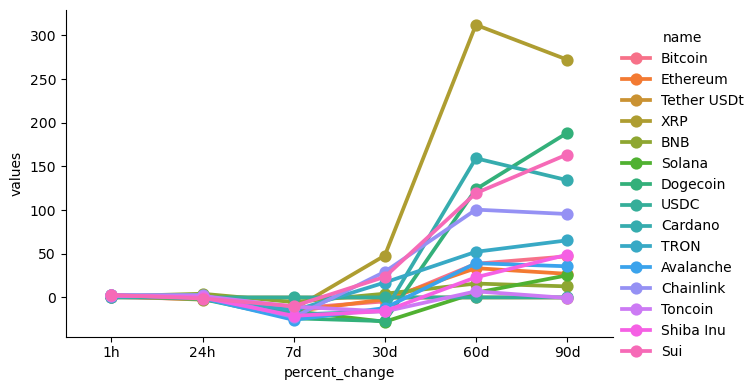

In [22]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point', height = 4, aspect=1.6)
#plt.yticks(range(-30, 30, 10))

In [23]:
df10 = df45[['name','quote.USD.price','timestamp']]
df10 = df10.query("name =='Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,100659.640111,2024-12-19 22:09:13.722886
15,Bitcoin,101006.115340,2024-12-19 22:10:14.335875
30,Bitcoin,101026.885353,2024-12-19 22:11:14.911848
45,Bitcoin,101038.100146,2024-12-19 22:12:15.402870


In [189]:
#df10['timestamp'] = df10['timestamp'].apply(lambda x: x[11:19]) Just for checking fig

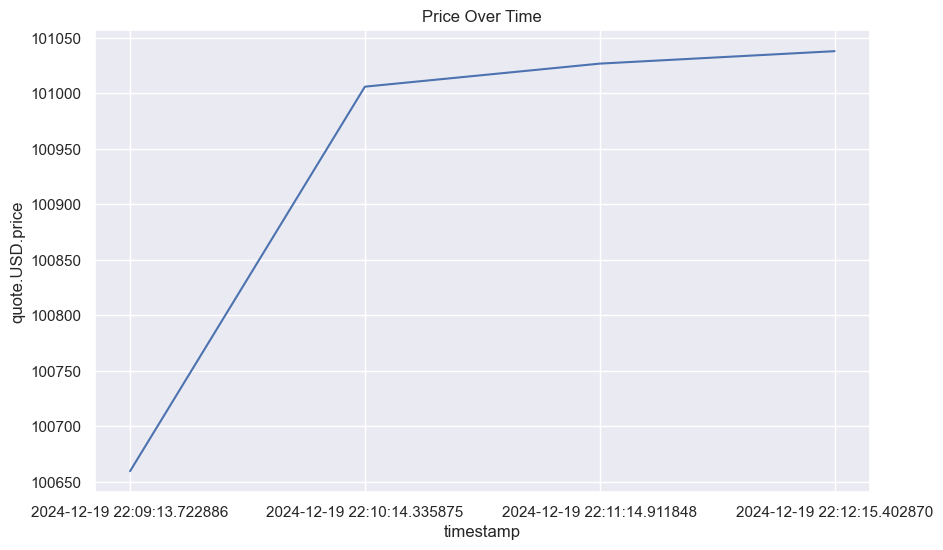

In [24]:
sns.set_theme(style = 'darkgrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x= 'timestamp', y = 'quote.USD.price',data=df10)
plt.title("Price Over Time")
plt.show()